In [31]:
%matplotlib inline

In [32]:
%run metro_traffic.py

In [33]:
xl, xt, yl, yt = getDataForNeuralNetworkModel(standardScaler=True, squashHoliday=False, dropDescription=True)

In [34]:
len(xl.columns)

27

In [35]:
xl.head()

,week_day,hour,temp,clouds_all,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,...,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm
21597,-0.503660,0.069822,1.247988,1.183811,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10509,-1.003930,-1.512957,-1.024372,-0.108651,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
26537,-1.504199,0.789267,0.378702,1.235510,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17988,-0.503660,-1.225179,-0.991806,1.183811,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7156,-0.503660,-1.512957,1.074305,-1.142621,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
model = makeNeuralNetworkModel(xl, yl, epochs=20, layers=[(27, 'relu'), (10, 'sigmoid'), (3, 'softmax')])

Epoch 1/20
30431/30431 [==============================] - 1s 42us/sample - loss: 0.7856 - acc: 0.6394
Epoch 2/20
30431/30431 [==============================] - 2s 51us/sample - loss: 0.5336 - acc: 0.7018
Epoch 3/20
30431/30431 [==============================] - 1s 47us/sample - loss: 0.4557 - acc: 0.7680
Epoch 4/20
30431/30431 [==============================] - 2s 59us/sample - loss: 0.4140 - acc: 0.8205
Epoch 5/20
30431/30431 [==============================] - 2s 53us/sample - loss: 0.3833 - acc: 0.8500
Epoch 6/20
30431/30431 [==============================] - 1s 42us/sample - loss: 0.3558 - acc: 0.8708
Epoch 7/20
30431/30431 [==============================] - 1s 42us/sample - loss: 0.3305 - acc: 0.8876
Epoch 8/20
30431/30431 [==============================] - 1s 42us/sample - loss: 0.3109 - acc: 0.8990
Epoch 9/20
30431/30431 [==============================] - 1s 42us/sample - loss: 0.2965 - acc: 0.9007
Epoch 10/20
30431/30431 [==============================] - 1s 43us/sample - loss: 

In [37]:
model.evaluate(xt.values, yt.values.ravel())

10144/10144 [==============================] - 0s 44us/sample - loss: 0.2595 - acc: 0.9050


[0.2594766672876919, 0.90496844]

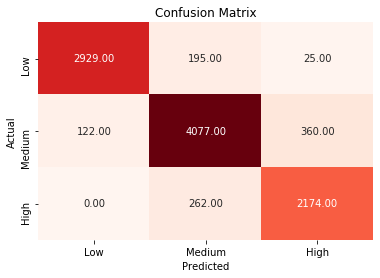

In [38]:
nnConfusionMatrix(model, xt, yt)

In [39]:
precision_score(yt.values.ravel(), nnPredict(model, xt.values), average=None)

array([0.96001311, 0.899206  , 0.84955061])

In [40]:
recall_score(yt.values.ravel(), nnPredict(model, xt.values), average=None)

array([0.93013655, 0.89427506, 0.89244663])

In [41]:
nnPredictLabels(model, xt.values[:1])

['Medium']

In [42]:
nnPredictionLabel(yt.values.ravel()[0])

'Medium'